# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice or writing algorithms which can discover pattenrs in visual data. Such as the camera of a self-driving car recongnizing the car in front.

## Get the data

The images we're working with are from the Food101 dataset (101 different classes of food) :https://www.kaggle.com/dansbecker/food-101

However we've modified it to only use two classes (pizza 🍕 & steak 🥩) using the image data modification notebook.

> 🔑 **Note:** We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up.

In [1]:
!pip install tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 64.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 90.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.0
    Uninstalling wrapt-1.17.0:
      Successfully uninstalled wrapt-1.17.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard
    Found existing installation

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-12-10 12:45:10--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.207, 142.251.2.207, 2607:f8b0:4023:c0d::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   218MB/s    in 0.5s    

2024-12-10 12:45:11 (218 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project... this usually means visualizing many samples of your data.

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}' .")

There are 2 directories and 0 images in 'pizza_steak' .
There are 2 directories and 0 images in 'pizza_steak/test' .
There are 0 directories and 250 images in 'pizza_steak/test/pizza' .
There are 0 directories and 250 images in 'pizza_steak/test/steak' .
There are 2 directories and 0 images in 'pizza_steak/train' .
There are 0 directories and 750 images in 'pizza_steak/train/pizza' .
There are 0 directories and 750 images in 'pizza_steak/train/steak' .


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first let's get the class names programmatically.

In [ ]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*") ])) # Created a list of class_names from the subdrectories
print(class_names)

['pizza' 'steak']


In [7]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directoru (we'll view images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f'Image shape: {img.shape}') # show the shape of the image

  return img

Image shape: (512, 512, 3)


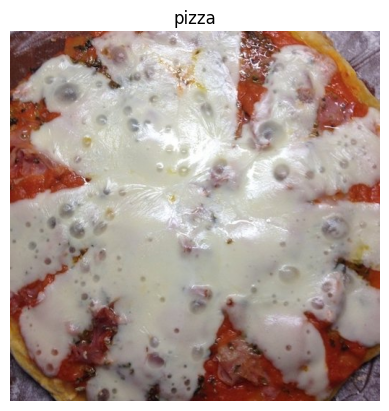

In [ ]:
# View random image from the training data set
img = view_random_image(target_dir="pizza_steak/train/",
                       target_class="pizza")

In [ ]:
# The images we've imported and plotted are actually giant arrays/tensors of differente pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[163, 152, 166],
        [173, 162, 176],
        [172, 160, 172],
        ...,
        [153, 144, 165],
        [148, 139, 160],
        [151, 142, 163]],

       [[151, 139, 151],
        [147, 135, 147],
        [149, 137, 149],
        ...,
        [153, 144, 165],
        [154, 145, 166],
        [143, 134, 155]],

       [[146, 133, 143],
        [125, 112, 122],
        [126, 113, 123],
        ...,
        [156, 147, 168],
        [157, 148, 169],
        [146, 137, 158]],

       ...,

       [[ 64,  50,  65],
        [ 67,  53,  68],
        [ 85,  72,  89],
        ...,
        [111,  94, 110],
        [105,  89, 102],
        [106,  90, 103]],

       [[ 58,  44,  59],
        [ 74,  60,  75],
        [ 90,  77,  94],
        ...,
        [114,  97, 113],
        [105,  89, 102],
        [112,  96, 109]],

       [[ 69,  55,  70],
        [ 78,  64,  79],
        [ 79,  66,  83],
        ...,
        [110,  93, 10

In [ ]:
# View the image shape
img.shape #returns width, height, color channels

(512, 512, 3)

>🔑**Note:** As we've discussed before, many machine learning models, including neural netwrodks prefer the values they works with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also referred to as **normalized**) their pixel values by dividing the image arrays by 255 (since 255 is the maximum pixel value).

In [ ]:
# GEt all the pixel values between 0 & 1
img /255

array([[[0.63921569, 0.59607843, 0.65098039],
        [0.67843137, 0.63529412, 0.69019608],
        [0.6745098 , 0.62745098, 0.6745098 ],
        ...,
        [0.6       , 0.56470588, 0.64705882],
        [0.58039216, 0.54509804, 0.62745098],
        [0.59215686, 0.55686275, 0.63921569]],

       [[0.59215686, 0.54509804, 0.59215686],
        [0.57647059, 0.52941176, 0.57647059],
        [0.58431373, 0.5372549 , 0.58431373],
        ...,
        [0.6       , 0.56470588, 0.64705882],
        [0.60392157, 0.56862745, 0.65098039],
        [0.56078431, 0.5254902 , 0.60784314]],

       [[0.57254902, 0.52156863, 0.56078431],
        [0.49019608, 0.43921569, 0.47843137],
        [0.49411765, 0.44313725, 0.48235294],
        ...,
        [0.61176471, 0.57647059, 0.65882353],
        [0.61568627, 0.58039216, 0.6627451 ],
        [0.57254902, 0.5372549 , 0.61960784]],

       ...,

       [[0.25098039, 0.19607843, 0.25490196],
        [0.2627451 , 0.20784314, 0.26666667],
        [0.33333333, 0

## And end-to-end example

Let's build a convolutional neural networks to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalization )
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=42,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNNn
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 15s 188ms/step - loss: 0.5630 - accuracy: 0.6980 - val_loss: 0.3642 - val_accuracy: 0.8440
Epoch 2/5
47/47 [==============================] - 7s 155ms/step - loss: 0.4262 - accuracy: 0.8113 - val_loss: 0.3386 - val_accuracy: 0.8660
Epoch 3/5
47/47 [==============================] - 6s 124ms/step - loss: 0.4242 - accuracy: 0.8147 - val_loss: 0.3313 - val_accuracy: 0.8700
Epoch 4/5
47/47 [==============================] - 7s 149ms/step - loss: 0.3572 - accuracy: 0.8493 - val_loss: 0.2989 - val_accuracy: 0.8740
Epoch 5/5
47/47 [==============================] - 6s 117ms/step - loss: 0.3185 - accuracy: 0.8680 - val_loss: 0.2993 - val_accuracy: 0.8820


> 🔑**Note:** If the above cell is taking longer than ~10 seconds per epoch, make sure you're usig a GPU.

In [ ]:
len(train_data)

47

In [ ]:
1500/32

46.875

We have 47 batches of 32 images and their labels. The reason we put things into batches is becase that way it can all fit in memory of our computer.

In [ ]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

## Using the same model as before

Let's replicate the model we've built in a previous section to see if it works with our image data.

The model we're building is from the TensorFlow playgroud.

In [ ]:
# Set random seed
tf.random.set_seed(42)

#Create model to replocate the TensorFlow playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit (train_data,
                         epochs=5,
                         steps_per_epoch=len(train_data),
                         validation_data=valid_data,
                         validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 7s 116ms/step - loss: 0.7985 - accuracy: 0.5060 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 6s 135ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 7s 145ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 5s 108ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 116ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Despiest having more parameters than our CNN (model_1), model_2 performs terribly... let's try to improve it.

In [ ]:
# Set the randomseed
tf.random.set_seed(42)

# create the model (same as above but let's stpe it up a notch)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer= tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 112ms/step - loss: 5.0718 - accuracy: 0.6107 - val_loss: 0.8288 - val_accuracy: 0.7400
Epoch 2/5
47/47 [==============================] - 6s 134ms/step - loss: 0.8822 - accuracy: 0.7067 - val_loss: 0.5934 - val_accuracy: 0.7700
Epoch 3/5
47/47 [==============================] - 5s 110ms/step - loss: 0.9970 - accuracy: 0.6940 - val_loss: 1.0728 - val_accuracy: 0.6080
Epoch 4/5
47/47 [==============================] - 6s 130ms/step - loss: 0.6269 - accuracy: 0.7460 - val_loss: 0.4885 - val_accuracy: 0.7560
Epoch 5/5
47/47 [==============================] - 5s 111ms/step - loss: 0.4596 - accuracy: 0.7967 - val_loss: 0.4870 - val_accuracy: 0.7780


In [ ]:
# Get summary of model 3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


>🔑 **Note:** You can think of trainable parameters as **patterns a model can learn from data**. Intuitiely, you might think more is better. And in some cases it is. But in this case, the difference here is in the two different styles of model we're using. Where a series of dense layers have a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image**. So even though there are less learnable parameters in our convolutional neural network, these are often more helpful in dephering between different **features** in an image.

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

## Binary Classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing & turning our data into batches)
3. Created a model(start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)


### 1. Become one with the data

Image shape: (512, 512, 3)
Image shape: (512, 382, 3)


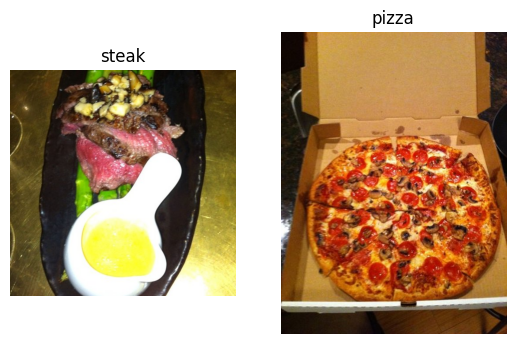

In [ ]:
# Visualize data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/","steak" )
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/","pizza")

### 2. Preprocess the data (prepare it for a model)


In [ ]:
# Define directory dataset paths
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

Our next step is to turn our data into **batches**.

A *batch* is a small subset of the data set that a model looks at during training. Rather than look at all ~10.000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10.000 images (or more) might not fit into the memory of your proccessor (GPU).
2. Trying to learn the patterns in 10.000 images in one hit could result in the model not being able to learn very well.


Why 32?

Because 32 is good for your [health](https://x.com/ylecun/status/989610208497360896?s=20)...

In [ ]:
# Create train and test data generators and rescale the data
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.) # divide all the pixel values by 255 (because we want them between 0 & 1)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load in our image data from directories and turn tem into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, #target directory of images
                                               target_size=(224,224), # target size of images
                                               class_mode="binary", # type of data you're working with
                                               batch_size =32) #size of minibatches to load data into
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode = "binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of a train data batch
images, labels = next(train_data) #get the next batch of images/labels in train data
len(images), len(labels)

(32, 32)

In [ ]:
# How many batches are there?
len(train_data)

47

In [ ]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.89019614, 0.89019614, 0.9215687 ],
          [0.89019614, 0.89019614, 0.9215687 ],
          [0.89019614, 0.89019614, 0.9215687 ],
          ...,
          [0.08235294, 0.08627451, 0.10588236],
          [0.08235294, 0.08627451, 0.10588236],
          [0.08235294, 0.08627451, 0.10588236]],
 
         [[0.89019614, 0.89019614, 0.9215687 ],
          [0.89019614, 0.89019614, 0.9215687 ],
          [0.89019614, 0.89019614, 0.9215687 ],
          ...,
          [0.09803922, 0.10196079, 0.12156864],
          [0.09803922, 0.10196079, 0.12156864],
          [0.07843138, 0.08235294, 0.10196079]],
 
         [[0.89019614, 0.89019614, 0.9215687 ],
          [0.89019614, 0.89019614, 0.9215687 ],
          [0.89019614, 0.89019614, 0.9215687 ],
          ...,
          [0.10196079, 0.10588236, 0.1254902 ],
          [0.08627451, 0.09019608, 0.10980393],
          [0.08627451, 0.09019608, 0.10980393]],
 
         ...,
 
         [[0.28235295, 0.34117648, 0.36078432],
          [0.27843

In [ ]:
images[7].shape

(224, 224, 3)

In [ ]:
# View the first batch of labels
labels

array([1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that yo setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

> 🔑**Note:** In deep learning, there is almost an infinite amount of architectures you could create. Son one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem)

In [ ]:
# Make the creating of our model a little easier.
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Activation
from tensorflow.keras import Sequential



In [ ]:
# Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224,224,3)), # input layer (specify input shape)
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid") #output layer (working with binary classification so only 1 output neuron)
])

If we have some information around the edges of a pictures, we should add some padding.

If the padding is = "same", the output shape is the same as the input shape. If padding = "valid", output shape gets compress.

Filter is the number of sliding windows going across an input (higher = more complex model)

Kernel_size = is the size of the sliding window going across an input.

Strides is the size of the step the silding window takes across and input.

In [ ]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Get a summary of our model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 4. Fit the model

In [ ]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 152ms/step - loss: 0.9357 - accuracy: 0.6673 - val_loss: 0.4238 - val_accuracy: 0.8060
Epoch 2/5
47/47 [==============================] - 5s 115ms/step - loss: 0.4416 - accuracy: 0.7980 - val_loss: 0.4035 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 7s 142ms/step - loss: 0.3307 - accuracy: 0.8647 - val_loss: 0.4396 - val_accuracy: 0.7960
Epoch 4/5
47/47 [==============================] - 6s 117ms/step - loss: 0.1644 - accuracy: 0.9380 - val_loss: 0.3813 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 7s 139ms/step - loss: 0.0562 - accuracy: 0.9873 - val_loss: 0.4830 - val_accuracy: 0.8160


## 5. Evaluate our model

It looks like our model is learning something, let's evaluate it.

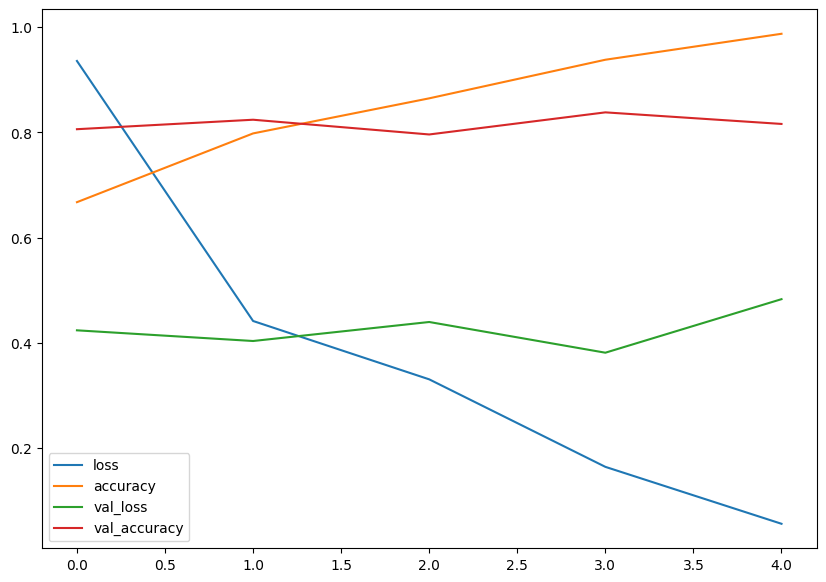

In [ ]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [12]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy= history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("epochs")
  plt.legend()



> 🔑**Note:** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize to useen data will be diminished.

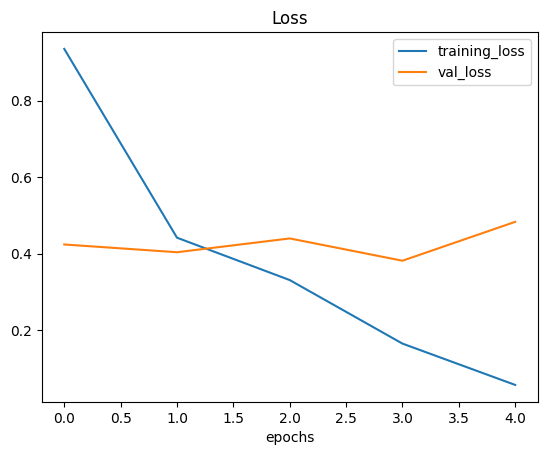

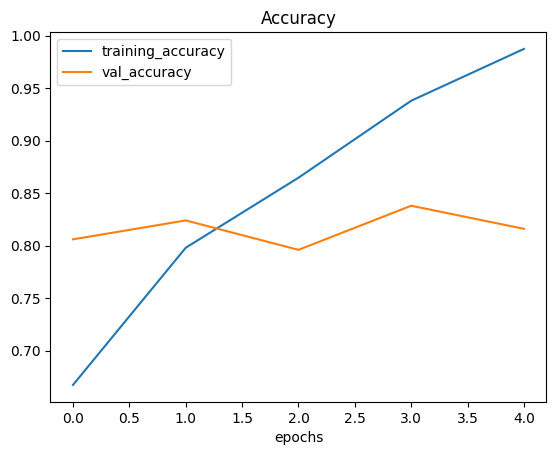

In [ ]:
# Check ut the loss and the accuracy of model_4
plot_loss_curves(history_4)

> 🔑**Note:** Ideally the two loss curves (training and validation) will be very similar to each other. If anything, the validation curve should be slightly under the training curve. If there's a large gap between the training curve and validation curve, it means your model is probably **overfitting**.

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:
0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:
* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer


Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

> 🔑 **Note:** Reducing overfitting is also known as *regularization*.

In [ ]:
# Create the model (this is going to be our new baseline)
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model_5 = Sequential([
    Conv2D(10,3,activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

In [ ]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 8s 141ms/step - loss: 0.6186 - accuracy: 0.6680 - val_loss: 0.4727 - val_accuracy: 0.7960
Epoch 2/5
47/47 [==============================] - 6s 117ms/step - loss: 0.5044 - accuracy: 0.7740 - val_loss: 0.4076 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 5s 111ms/step - loss: 0.4823 - accuracy: 0.7760 - val_loss: 0.4048 - val_accuracy: 0.8220
Epoch 4/5
47/47 [==============================] - 7s 141ms/step - loss: 0.4369 - accuracy: 0.8027 - val_loss: 0.3846 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 6s 117ms/step - loss: 0.4059 - accuracy: 0.8293 - val_loss: 0.3849 - val_accuracy: 0.8280


In [ ]:
# Get a summary with pir model with max pooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       

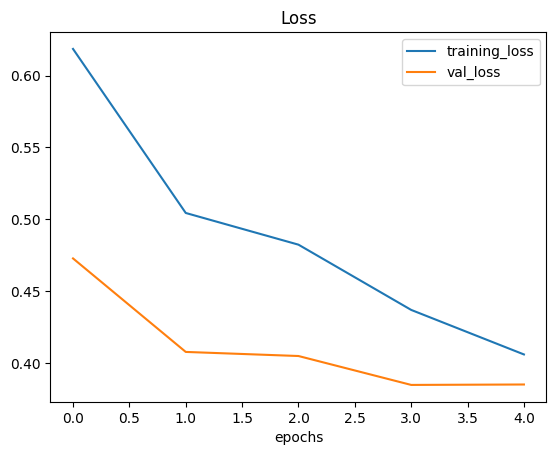

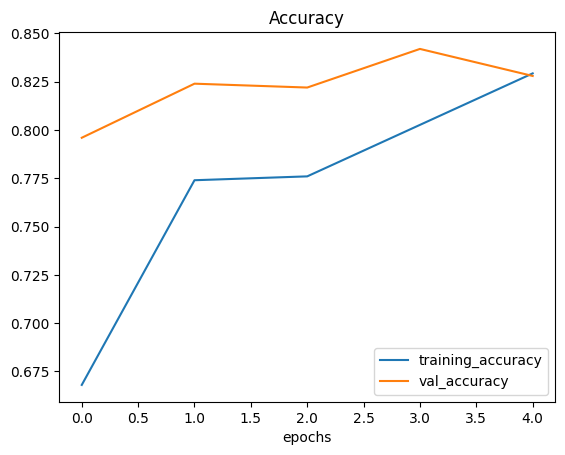

In [ ]:
# Plot loss curves
plot_loss_curves(history_5)

### Opening our bag of trickis and finding data augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented= ImageDataGenerator(rescale=1/255.,
                                            rotation_range=0.2, #how much do you want to rotate an image?
                                            shear_range=0.2, # how much do uou want to shear an image?
                                            zoom_range=0.2, #zoom in randomly on an image
                                            width_shift_range=0.2, #move your image around on the x-axis
                                            height_shift_range=0.3, #move your image around on th y-axis
                                            horizontal_flip=True) # do you want to flip an image?

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation  for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

> 🤔**Question?:** What is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altetring might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Looking at the same image but from different perspective.

Let's write some code to visualize data augmentation...

In [ ]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


🔑 **Note:** Data augmentation is usally only performed on the training data. Using the `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are randomly manipulated when loaded into the model.

In [ ]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same

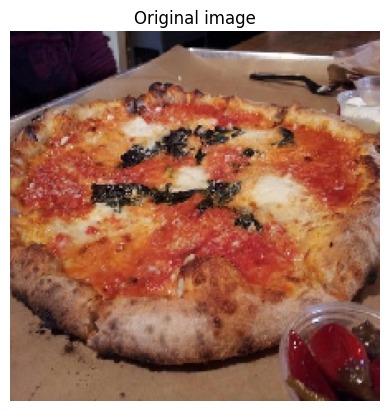

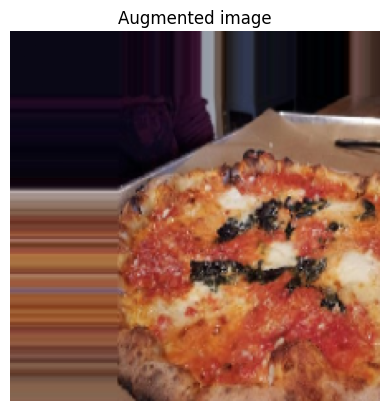

In [ ]:
# Show original image and augmented image
random_number = random.randint(0, 31) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

Now we've seen what augmented training data looks like, let's build a model and see how it learns on augmented data.

In [ ]:
# Create the model (this is going to be our new baseline)
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model_6 = Sequential([
    Conv2D(10,3,activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

In [ ]:
# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 21s 417ms/step - loss: 0.7120 - accuracy: 0.4640 - val_loss: 0.6895 - val_accuracy: 0.5480
Epoch 2/5
47/47 [==============================] - 21s 448ms/step - loss: 0.6919 - accuracy: 0.5287 - val_loss: 0.6770 - val_accuracy: 0.5860
Epoch 3/5
47/47 [==============================] - 20s 420ms/step - loss: 0.6842 - accuracy: 0.5407 - val_loss: 0.6508 - val_accuracy: 0.7320
Epoch 4/5
47/47 [==============================] - 21s 448ms/step - loss: 0.6808 - accuracy: 0.6020 - val_loss: 0.6595 - val_accuracy: 0.7160
Epoch 5/5
47/47 [==============================] - 21s 449ms/step - loss: 0.6392 - accuracy: 0.6573 - val_loss: 2.1844 - val_accuracy: 0.5020


The reason why it took a little bit longer per epoch is because the data augmentation doesn;t alter the training data that we have in our files it does it on the fly, so as it's loaded in.

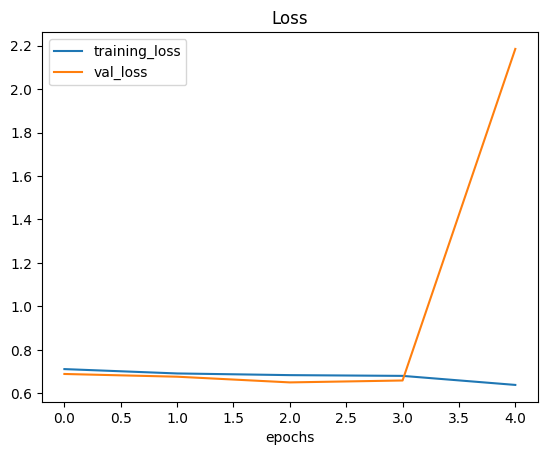

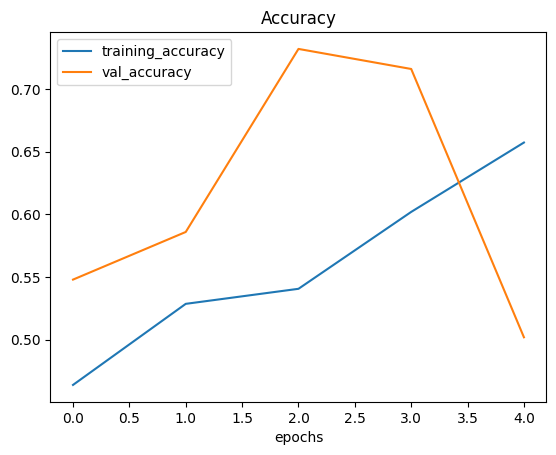

In [ ]:
# Check our models training curves
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model (the same as before) on it as see what happens.

In [ ]:
# Import data and augmented it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode="binary",
                                                                            shuffle = True) # Shuffle data (default)
#

Found 1500 images belonging to 2 classes.


In [ ]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
    Conv2D(10,3,activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 21s 411ms/step - loss: 0.6552 - accuracy: 0.5993 - val_loss: 0.5293 - val_accuracy: 0.7540
Epoch 2/5
47/47 [==============================] - 22s 473ms/step - loss: 0.5739 - accuracy: 0.7020 - val_loss: 0.4536 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 20s 421ms/step - loss: 0.5067 - accuracy: 0.7527 - val_loss: 0.3977 - val_accuracy: 0.8160
Epoch 4/5
47/47 [==============================] - 21s 443ms/step - loss: 0.4897 - accuracy: 0.7640 - val_loss: 0.3645 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 20s 421ms/step - loss: 0.4968 - accuracy: 0.7620 - val_loss: 0.3740 - val_accuracy: 0.8500


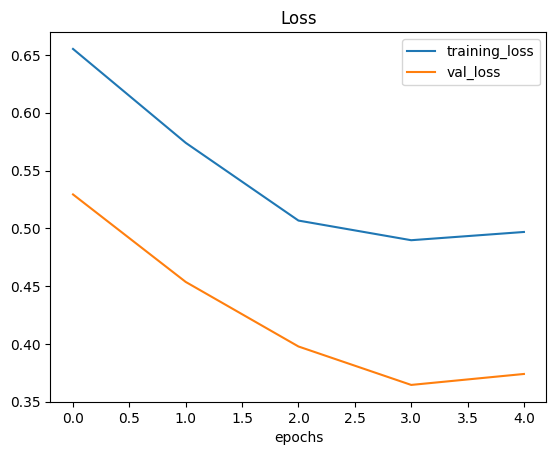

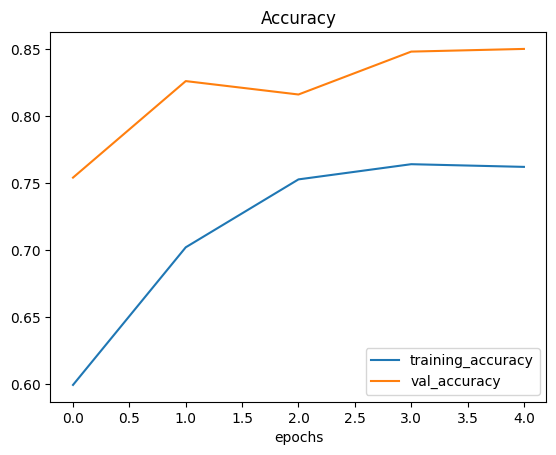

In [ ]:
plot_loss_curves(history_7)

> 🔑 **Note:** When shuffling data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak)

### 7. Repeat until satisfied

Since we've already beaten our baseline, there a few things we could try to improve our model:

* Increase the number of model layers (e.g. add more `Conv2D` / `MaxPool2D` layers)
* Increase the number of filters in each convlolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunites to learn)
* Use **transfer learning** to leverage what another image model has learn and adjust it for our own use case.

> ⚒ **Practice:** Recreate the model on the CNN explainer (same as `model_1`) and see how it perfomrs on the shuffled training data.  

In [ ]:
# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_8 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(32,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(32,3,activation="relu"),
    tf.keras.layers.Conv2D(32,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNNn
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=13,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/13
47/47 [==============================] - 23s 458ms/step - loss: 0.6604 - accuracy: 0.6193 - val_loss: 0.5599 - val_accuracy: 0.7920
Epoch 2/13
47/47 [==============================] - 22s 466ms/step - loss: 0.5624 - accuracy: 0.7180 - val_loss: 0.3739 - val_accuracy: 0.8460
Epoch 3/13
47/47 [==============================] - 21s 450ms/step - loss: 0.4875 - accuracy: 0.7773 - val_loss: 0.3602 - val_accuracy: 0.8360
Epoch 4/13
47/47 [==============================] - 22s 461ms/step - loss: 0.4891 - accuracy: 0.7660 - val_loss: 0.3481 - val_accuracy: 0.8720
Epoch 5/13
47/47 [==============================] - 20s 435ms/step - loss: 0.4512 - accuracy: 0.8000 - val_loss: 0.4365 - val_accuracy: 0.7860
Epoch 6/13
47/47 [==============================] - 22s 464ms/step - loss: 0.4701 - accuracy: 0.7827 - val_loss: 0.3173 - val_accuracy: 0.8700
Epoch 7/13
47/47 [==============================] - 21s 457ms/step - loss: 0.4067 - accuracy: 0.8267 - val_loss: 0.3520 - val_accuracy: 0.8660

## Making a prediction with our trained model on our own custom data

In [ ]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2024-12-10 12:58:14--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.05s   

2024-12-10 12:58:14 (37.7 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

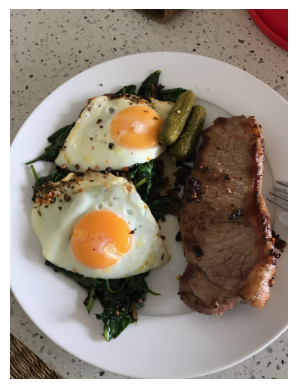

In [ ]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [ ]:
steak.shape

(4032, 3024, 3)

> 🔑 **Note:** When you train a neural network and you want to make a prediction with it on your own custo data, it's important than your custom data (or new data) is preprocessed into the same format as the data your model was trained on.

In [30]:
# Create a function to import and image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it
  to (img_shape, img_shape, color_channels)
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img


In [ ]:
# Load in and preprocess our custome image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
pred= model_8.predict(tf.expand_dims(steak, axis=0))
pred

1/1 [==============================] - 0s 18ms/step


array([[0.91932863]], dtype=float32)

Looks like our custom image is being put through our model, however, it currently outputs a prediction probability, wouldn't it be nice if we could visualize the image as well as the model's prediction?

In [ ]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# We can index the predicted class by rounding the prediciotn probability and indexing it
# on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [27]:
def pred_and_plot(model, filename, class_names = class_names):
  """
  Imports and image located at filename, makes a prediction with model and
  plots the image with the predicted class as the title.
  """
  # import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);


1/1 [==============================] - 0s 54ms/step


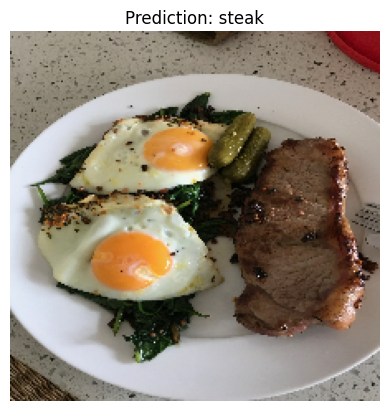

In [ ]:
# Test our model on a custom image
pred_and_plot(model_8, "03-steak.jpeg")

Our model works! Let's try it on another image... this time pizza 🍕

--2024-12-10 14:13:14--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.4’

03-pizza-dad.jpeg.4 100%[===================>]   2.74M  --.-KB/s    in 0.06s   

2024-12-10 14:13:15 (47.7 MB/s) - ‘03-pizza-dad.jpeg.4’ saved [2874848/2874848]

1/1 [==============================] - 0s 64ms/step


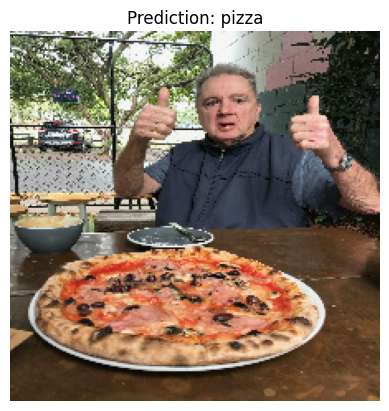

In [ ]:
# Download another test custom image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_8, "03-pizza-dad.jpeg")

# Multi-class Image Classification

We've just been through a bunch of the following steps with a binary classificatin problem (pizza vs. steak), now we're going to step things up a notch with 10 classes of food (multi-class classification).

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust differente hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied.


## 1. Import and become one with the data

In [2]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()


--2024-12-11 08:38:55--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.202.207, 74.125.69.207, 64.233.181.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.202.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   238MB/s    in 2.1s    

2024-12-11 08:38:58 (238 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [3]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in '10_food_classes_all_data'
There are 10 directories and 0 images in '10_food_classes_all_data/train'
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'
There are 1

In [4]:
# Set up the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [5]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (384, 512, 3)


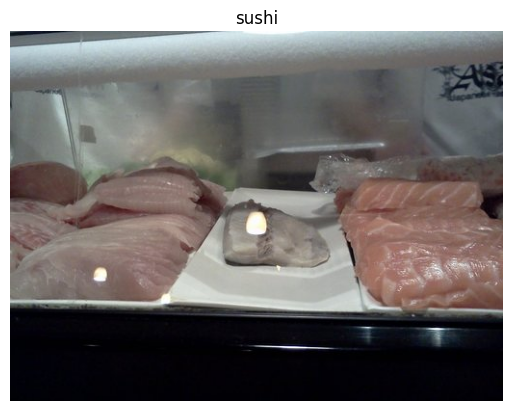

In [8]:
# Visualize, visualize, visualize
import random
img = view_random_image(target_dir = train_dir,
                        target_class = random.choice(class_names))

### 2. Preprocess the data (prepare it for a model)

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size = 32,
                                               class_mode="categorical")
test_data= test_datagen.flow_from_directory(test_dir,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode = "categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a baseline model

We've been talking a lot about the CNN explainer website... how about we just take their model (also 10 classes) and use it in our problem...?

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model (very similar to previous models but actually the same as CNN explainer website)
model_9 = Sequential([
    Conv2D(10,3, input_shape=(224,224,3)),
    Activation(activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")  #changed to have 10 output neuros and use the softmax activation function
])

# Compile the model
model_9.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])



### 4. Fit a model

In [11]:
# Fit the model
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 529s 2s/step - loss: 2.1572 - accuracy: 0.2091 - val_loss: 2.0959 - val_accuracy: 0.2484
Epoch 2/5
235/235 [==============================] - 528s 2s/step - loss: 1.8808 - accuracy: 0.3507 - val_loss: 1.9035 - val_accuracy: 0.3416
Epoch 3/5
235/235 [==============================] - 523s 2s/step - loss: 1.5732 - accuracy: 0.4660 - val_loss: 1.8645 - val_accuracy: 0.3724
Epoch 4/5
235/235 [==============================] - 525s 2s/step - loss: 1.1474 - accuracy: 0.6148 - val_loss: 2.0390 - val_accuracy: 0.3516
Epoch 5/5
235/235 [==============================] - 525s 2s/step - loss: 0.6811 - accuracy: 0.7748 - val_loss: 2.7720 - val_accuracy: 0.3208


### 5. Evaluate the model

In [15]:
# Evaluate on the test data
model_9.evaluate(test_data)

79/79 [==============================] - 54s 675ms/step - loss: 2.7720 - accuracy: 0.3208


[2.771984338760376, 0.3208000063896179]

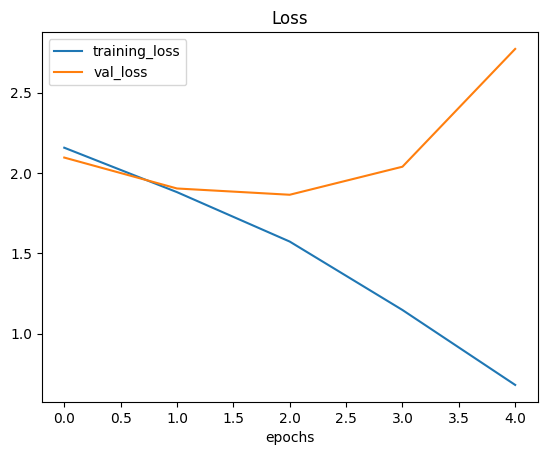

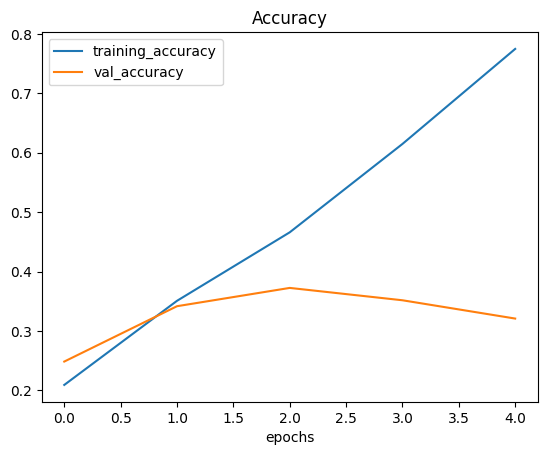

In [13]:
# Check out the model's loss curves on the 10 classes
plot_loss_curves(history_9)

What do these loss curves tell us?

Well... it seems our model is **overfitting** the training set quite badly... in other words, it's getting great results on the training data but fails to generalize well to unseen data and perfomrs poorly on the test dataset.

### 6. Adjust the model hyperparameters (to beat the baseline/reduce overfitting)

Due to its performance on the training data, it's clear our model is learning something...

However, it's not generalizing well to unseen data (overfitting).

So, let's tru and fix overfitting by...

* **Get more data** - having more data gives a model more opportunity to learn diverse patterns...
* **Simply the model** - if our current model is overfitting the data, it may be too complicated of a model, one way to simply a model is to: reduce # of layers or reduce # hidden units in layers.
* **Use data augmentation** - data augmentation manipulates the training data in such a way to add more diversity to it (without altering the original data).
* **Use transfer learning** - transfer learning leverages the patterns another model another model has learned on similar data to your own and allows you to use those patterns on your own dataset.

In [16]:
# How about we try and simplify the model firts?
# Let's try to remove 2 convolutional layers...
model_10 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

model_10.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

In [17]:
# Fit the model with 2x conv layers removed
history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data = test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 243s 1s/step - loss: 2.1958 - accuracy: 0.2093 - val_loss: 1.9959 - val_accuracy: 0.3056
Epoch 2/5
235/235 [==============================] - 239s 1s/step - loss: 1.8184 - accuracy: 0.3757 - val_loss: 1.9638 - val_accuracy: 0.3132
Epoch 3/5
235/235 [==============================] - 243s 1s/step - loss: 1.4573 - accuracy: 0.5237 - val_loss: 2.0649 - val_accuracy: 0.3096
Epoch 4/5
235/235 [==============================] - 243s 1s/step - loss: 0.9571 - accuracy: 0.7023 - val_loss: 2.2549 - val_accuracy: 0.3064
Epoch 5/5
235/235 [==============================] - 245s 1s/step - loss: 0.4882 - accuracy: 0.8665 - val_loss: 2.5832 - val_accuracy: 0.3008


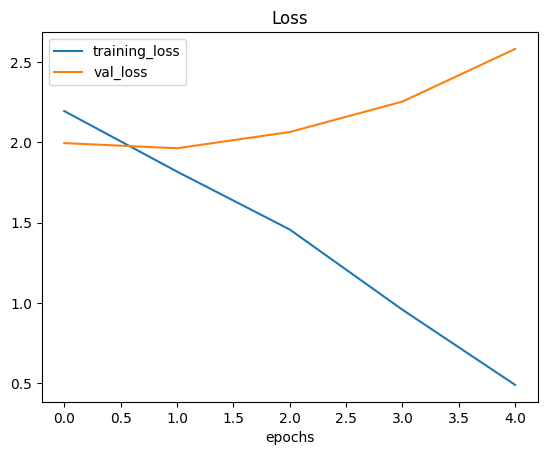

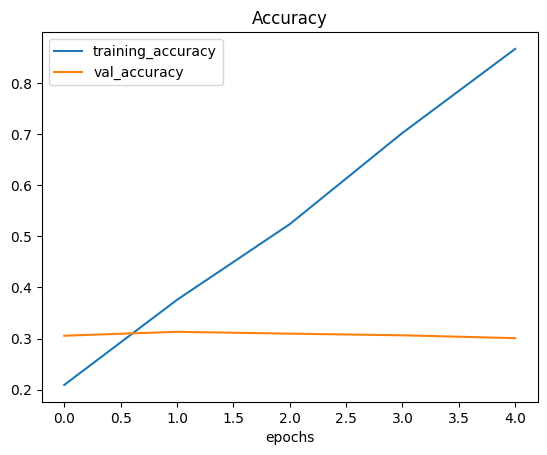

In [18]:
# Check out the oss curves of model_10
plot_loss_curves(history_10)

Looks like our "simplifying the model" experiment didn't work... the accuracy went down and overfitting continued...

How about we try data augmentation??

### Trying to reduce overfitting with data augmentation

Let's try and improve our model's results by using augmented training data...

Ideally, we want to:
* Reduce overfitting (get the train and validation loss curves closer)
* Improve validation accuracy


In [19]:
# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                               rotation_range=20,
                                               shear_range=0.2,
                                               zoom_range=0.2,
                                             horizontal_flip=True)
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224,224),
                                                                  batch_size=32,
                                                                  class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [20]:
# Let's create another model but this time we'll fit it on the agumented training data of 10 classes
model_11 = tf.keras.models.clone_model(model_9)

# Compile the cloned model (using the same setup as previous models)
model_11.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])



In [21]:
# Fit the model
history_11 = model_11.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data = test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 604s 3s/step - loss: 2.2117 - accuracy: 0.1681 - val_loss: 2.1169 - val_accuracy: 0.2420
Epoch 2/5
235/235 [==============================] - 601s 3s/step - loss: 2.0132 - accuracy: 0.2776 - val_loss: 1.9090 - val_accuracy: 0.3400
Epoch 3/5
235/235 [==============================] - 602s 3s/step - loss: 1.9030 - accuracy: 0.3344 - val_loss: 1.8020 - val_accuracy: 0.3660
Epoch 4/5
235/235 [==============================] - 631s 3s/step - loss: 1.8442 - accuracy: 0.3629 - val_loss: 1.7603 - val_accuracy: 0.3932
Epoch 5/5
235/235 [==============================] - 600s 3s/step - loss: 1.8019 - accuracy: 0.3752 - val_loss: 1.7083 - val_accuracy: 0.4160


In [22]:
model_9.evaluate(test_data)

79/79 [==============================] - 55s 691ms/step - loss: 2.7720 - accuracy: 0.3208


[2.7719838619232178, 0.3208000063896179]

In [23]:
model_11.evaluate(test_data)

79/79 [==============================] - 55s 690ms/step - loss: 1.7083 - accuracy: 0.4160


[1.7082847356796265, 0.41600000858306885]

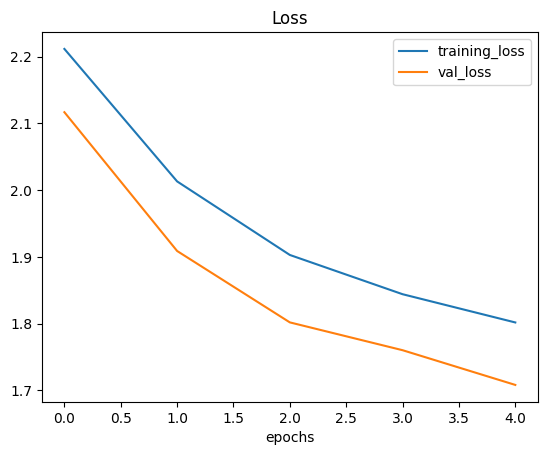

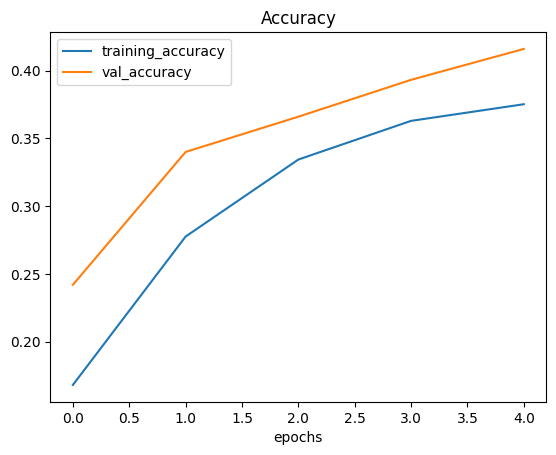

In [24]:
plot_loss_curves(history_11)

Woah! That looks much better, the loss curves are much closer to each other than the baseline model and they look like they're heading in the right direction (certainly not the wrong direction) so if we were to train for longer, we might see further improvements.

### 7. Repeat until satisfied

We could keep going here... continually trying to bring our loss curves closer together and trying to improve the validation/test accuracy.

How?

By running lots of experiments, namely:
- restructuring our model's architecture (incresaing layers/ hidden units)
- adjust the learning rate
- try different methods of data augmentation (adjust the hyperparameters in our ImageDataGenerator instance)
- training for longer (e.g. 10 epochs instead)
- try **transfer learning**


### Making a predictions with our trained images

Let's use our trained model to make some predictions on our own custom images!

In [25]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [28]:
# Download some custom images
# -q is for "quiet"
!wget  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

--2024-12-11 11:35:06--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.08s   

2024-12-11 11:35:06 (35.2 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]

--2024-12-11 11:35:06--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting

In [32]:
# Reconfig function to work with multi-class images
def pred_and_plot(model, filename, class_names = class_names):
  """
  Imports and image located at filename, makes a prediction with model and
  plots the image with the predicted class as the title.
  """
  # import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add in logic for multi-class & get pred_class name
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);



1/1 [==============================] - 0s 49ms/step


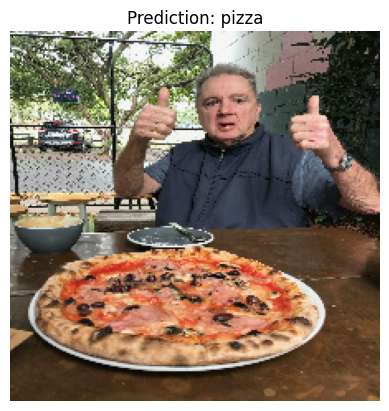

In [33]:
# Make a prediction
pred_and_plot(model=model_11,
              filename="03-pizza-dad.jpeg",
              class_names= class_names)

1/1 [==============================] - 0s 38ms/step


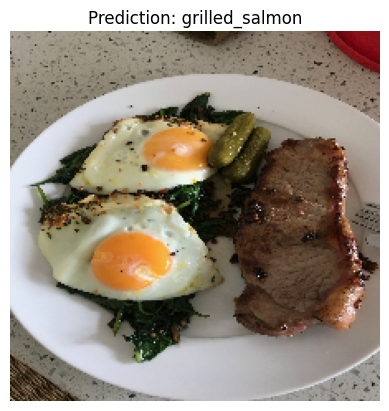

In [34]:
# Make a prediction
pred_and_plot(model=model_11,
              filename="03-steak.jpeg",
              class_names= class_names)

1/1 [==============================] - 0s 66ms/step


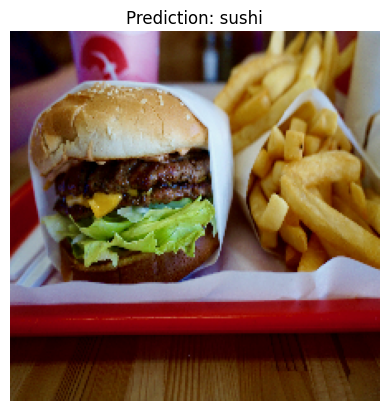

In [35]:
# Make a prediction
pred_and_plot(model=model_11,
              filename="03-hamburger.jpeg",
              class_names= class_names)

1/1 [==============================] - 0s 64ms/step


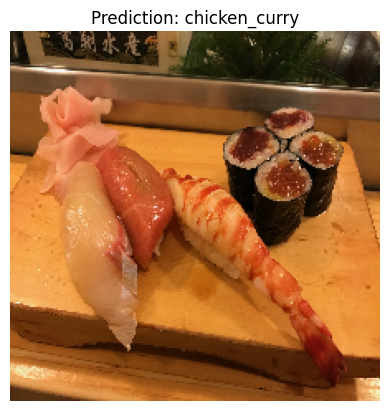

In [37]:
# Make a prediction
pred_and_plot(model=model_11,
              filename="03-sushi.jpeg",
              class_names= class_names)

Look like our model didn't perfomr very well on our custom images this is because it only achieved ~39% accuracy on the test data. So we can expect it to function quite poorly on other unseen data.

## Saving and loading our model

In [39]:
# Save a model
model_11.save("saved_trained_model_11")

In [40]:
# Load in a trained model and evaluate it
loaded_model_11 = tf.keras.models.load_model("saved_trained_model_11")
loaded_model_11.evaluate(test_data)

79/79 [==============================] - 55s 695ms/step - loss: 1.7083 - accuracy: 0.4160


[1.7082853317260742, 0.41600000858306885]

In [41]:
model_11.evaluate(test_data)

79/79 [==============================] - 56s 705ms/step - loss: 1.7083 - accuracy: 0.4160


[1.7082852125167847, 0.41600000858306885]